In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [2]:
DATASET_PATH = 'Datasets/final_combined_dataset_cleaned.csv'

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head()

,text,label
0,@BabozeirasDaTv @aliviavasconc @Haddad_Fernand...,NaN
1,@TelesPonte @rei_da_selfie @TCelTito @metal_th...,NaN
2,No ultimo podcast Café Brasil (um dos maiores ...,NaN
3,@zelune @Haddad_Fernando @jairbolsonaro PARABÉ...,NaN
4,@ManuelaDavila Nunca vi tanto passa-fome junto :),NaN


In [4]:
df.shape

(3919292, 2)

In [5]:
df.isna().sum()

text           4
label    3228044
dtype: int64

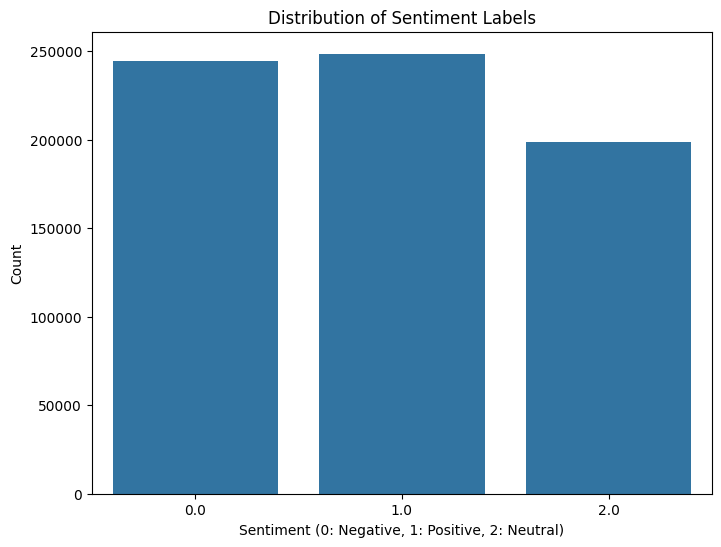

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0: Negative, 1: Positive, 2: Neutral)')
plt.ylabel('Count')
plt.show()

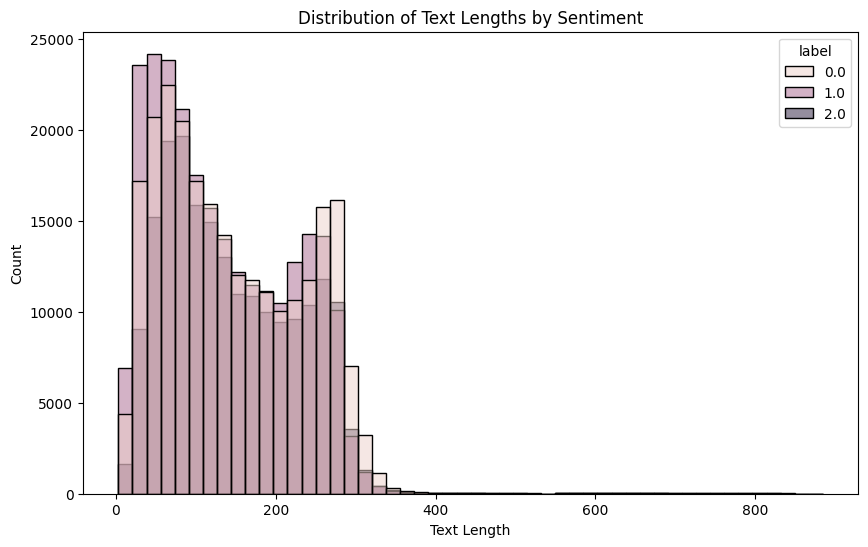

In [7]:
df['text_length'] = df['text'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=50)
plt.title('Distribution of Text Lengths by Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

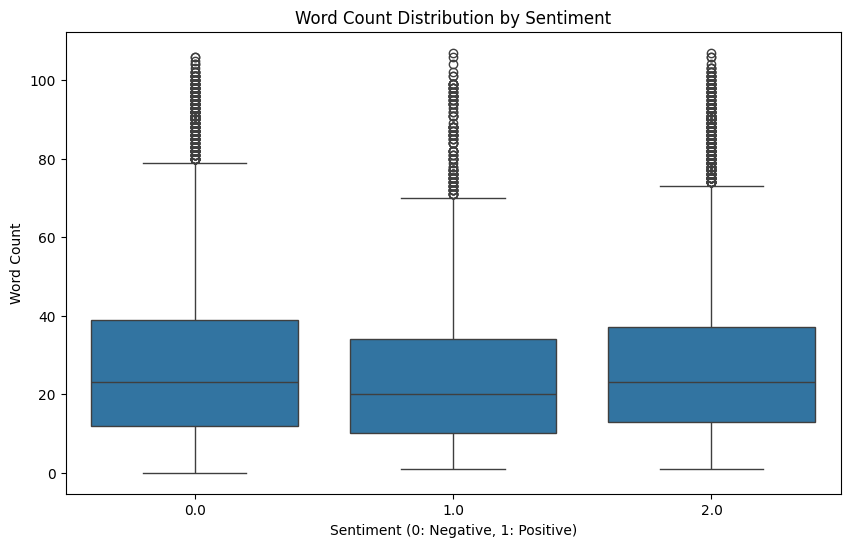

In [8]:
df['word_count'] = df['text'].str.split().str.len()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='word_count')
plt.title('Word Count Distribution by Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Word Count')
plt.show()

In [9]:
print("Text Length Statistics by Sentiment:")
print(df.groupby('label')['text_length'].describe())

Text Length Statistics by Sentiment:
          count        mean        std  min   25%    50%    75%    max
label                                                                 
0.0    244144.0  147.504546  90.467937  4.0  70.0  131.0  225.0  885.0
1.0    248514.0  133.564411  84.032034  3.0  61.0  116.0  205.0  855.0
2.0    198586.0  146.480759  84.043070  4.0  77.0  131.0  213.0  864.0


In [10]:
print("Word Count Statistics by Sentiment:")
print(df.groupby('label')['word_count'].describe())

Word Count Statistics by Sentiment:
          count       mean        std  min   25%   50%   75%    max
label                                                              
0.0    244144.0  25.982228  15.635015  0.0  12.0  23.0  39.0  106.0
1.0    248514.0  22.971318  14.635454  1.0  10.0  20.0  34.0  107.0
2.0    198586.0  25.817973  14.565687  1.0  13.0  23.0  37.0  107.0


In [11]:
print("\nSample Positive Texts:")
print(df[df['label'] == 1]['text'].sample(3).tolist())
print("\nSample Negative Texts:")
print(df[df['label'] == 0]['text'].sample(3).tolist())


Sample Positive Texts:
['givna good', 'shahparism incredible auction reserve  xtz tezos nftcommunity tezoscollectors', 'i really love aespa and theyre really talented but i hope they can improve their stage presence even more and also develop their cohesiveness as a group to really establish their identity as a th gen leader']

Sample Negative Texts:
['itsthemainman americangrit thathollowguy hodlcolorado shoenhead likewise the data that youve posted on the reasons for abortion is flawed it was women reporting the specific reasons for their abortion but its far less likely that someone who went through trauma from their abortion ie people who had health risks would divulge that info', 'usuncovered change the thumbnail you used the wrong rocket this is his rocket everybody hates the other rocket', 'the love you do not seek he does not expect you dont choose it was born by chance when you least expect it it just comes it comes on the saddest day in the darkest period or even when you ha

In [12]:
def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

In [13]:
def generate_wordcloud(text_data, title):
    # Combine all text
    text = ' '.join(text_data)
    # Clean the text
    text = clean_text(text)
    
    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        contour_width=3,
        contour_color='steelblue'
    ).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [35]:
sentiment_labels = {
    0: 'Negative',
    1: 'Positive',
    2: 'Neutral'
}


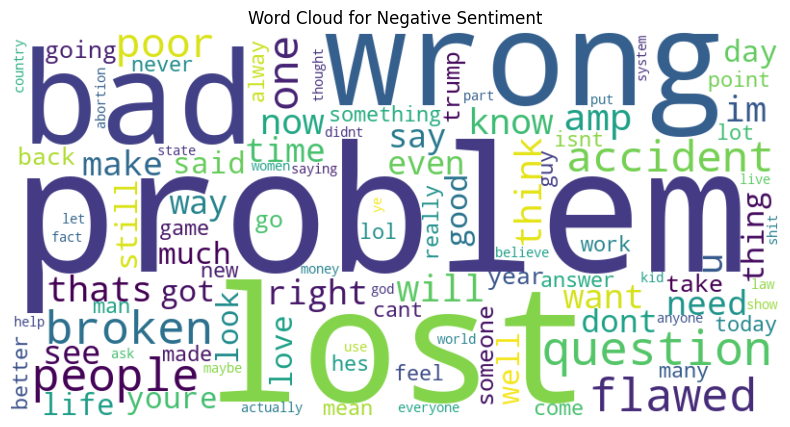

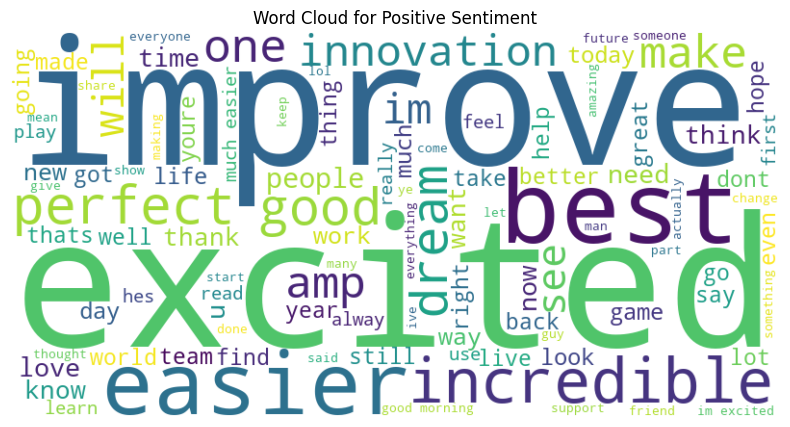

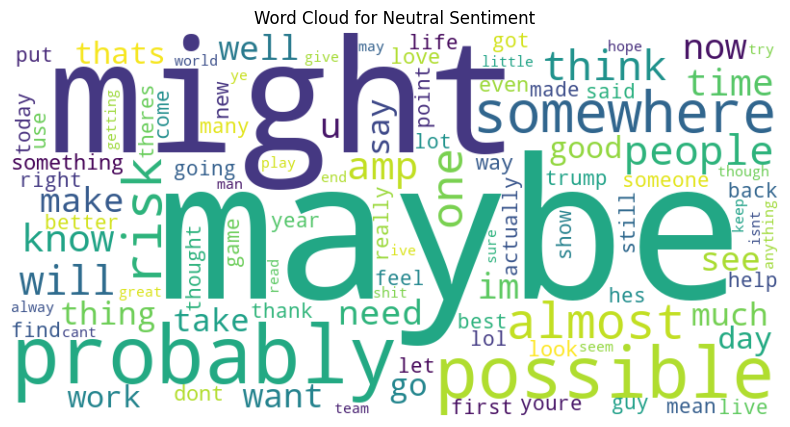

In [15]:
for label, sentiment in sentiment_labels.items():
    text_data = df[df['label'] == label]['text'].dropna()
    if not text_data.empty:
        generate_wordcloud(text_data, f'Word Cloud for {sentiment} Sentiment') 

In [16]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chyavanshenoy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chyavanshenoy/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chyavanshenoy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
hindi_stopwords = [
    'अंदर', 'अत', 'अदि', 'अप', 'अपना', 'अपनि', 'अपनी', 'अपने', 'अभि', 'अभी', 'आदि', 'आप', 'इंहिं', 'इंहें', 'इंहों', 'इतयादि', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकि', 'इसकी', 'इसके', 'इसमें', 'इसि', 'इसी', 'इसे', 'उंहिं', 'उंहें', 'उंहों', 'उन', 'उनका', 'उनकि', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसि', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'एसे', 'ऐसे', 'ओर', 'और', 'कइ', 'कई', 'कर', 'करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफि', 'काफ़ी', 'कि', 'किंहें', 'किंहों', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसि', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोइ', 'कोई', 'कोन', 'कोनसा', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जहां', 'जा', 'जिंहें', 'जिंहों', 'जितना', 'जिधर', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जेसा', 'जेसे', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिंहें', 'तिंहों', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थि', 'थी', 'थे', 'दबारा', 'दवारा', 'दिया', 'दुसरा', 'दूसरा', 'दो', 'द्वारा', 'न', 'नहिं', 'नही', 'नहीं', 'ना', 'निचे', 'निहायत', 'नीचे', 'ने', 'पर', 'पहले', 'पुरा', 'पूरा', 'पे', 'फिर', 'बनि', 'बनी', 'बहि', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भि', 'भितर', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यहां', 'यहि', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रवासा', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वहाँ', 'वहां', 'वहिं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभि', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'हि', 'ही', 'हुअ', 'हुआ', 'हुइ', 'हुई', 'हुए', 'हे', 'हें', 'है', 'हैं', 'हो', 'होता', 'होति', 'होती', 'होते', 'होना', 'होने'
]

In [26]:
stop_words_portuguese = set(stopwords.words('portuguese'))
stop_words_french = set(stopwords.words('french'))
stop_words_nepali = set(stopwords.words('nepali'))
stop_words_english = set(stopwords.words('english'))
stop_words_hindi = set(hindi_stopwords)

In [27]:
def remove_stopwords(text):
    # Tokenize the input text
    tokens = word_tokenize(text)
    
    # Remove stopwords and non-alphabetic tokens
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words_portuguese and word not in stop_words_english and word not in stop_words_hindi and word not in stop_words_nepali and word not in stop_words_french]
    
    # Join the tokens back into a string
    return ' '.join(filtered_tokens)

In [30]:
df['text_lower'] = df['text'].str.lower().astype(str).fillna('')

In [31]:
df['text_clean'] = df['text_lower'].apply(remove_stopwords)

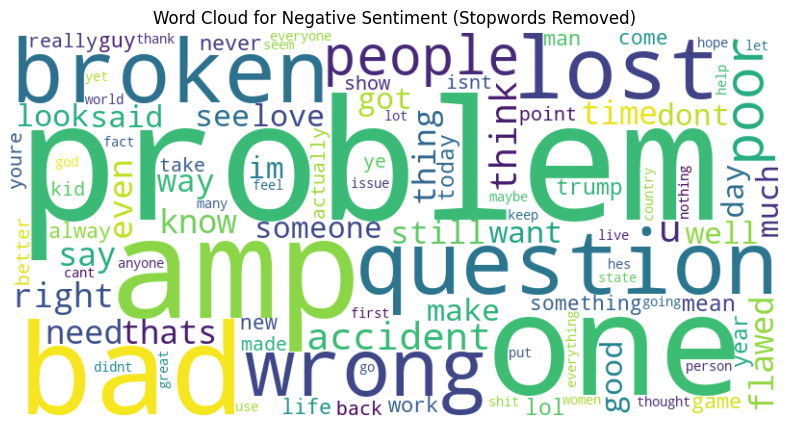

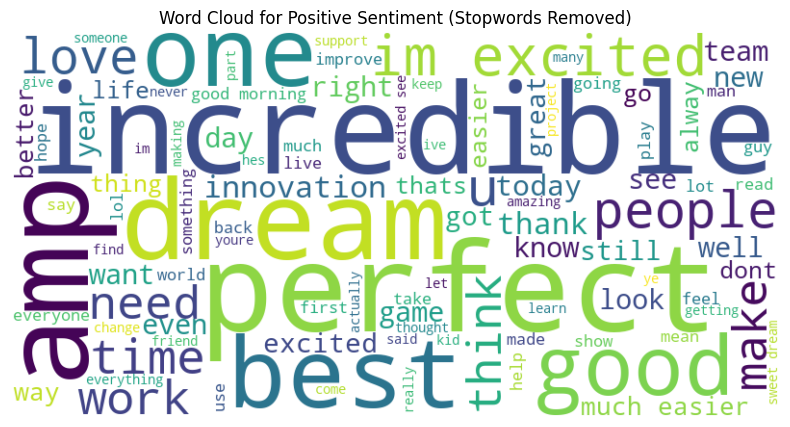

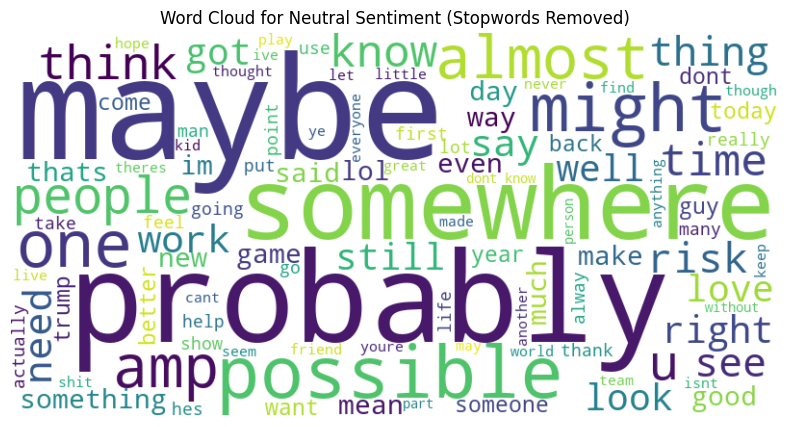

In [32]:
for label, sentiment in sentiment_labels.items():
    text_data = df[df['label'] == label]['text_clean'].dropna()
    if not text_data.empty:
        generate_wordcloud(text_data, f'Word Cloud for {sentiment} Sentiment (Stopwords Removed)')

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
def plot_top_n_grams(corpus, title, n=2, top_k=15, sentiment_label_for_palette="Positive"):
    try:
        # We don't need NLTK stopwords here if the corpus is already cleaned
        # and stopwords removed. If not, you can add stop_words='english' or your list.
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

        if not words_freq:
            print(f"No {n}-grams found for '{title}'. This might happen if text is too short after cleaning or vocabulary is very small.")
            return

        top_df = pd.DataFrame(words_freq[:top_k], columns=['Ngram', 'Frequency'])

        plt.figure(figsize=(12, 8))
        palette_colors = {'Positive': 'Greens_r', 'Negative': 'Reds_r', 'Neutral': 'Blues_r', 'Default': 'viridis'}
        sns.barplot(x='Frequency', y='Ngram', data=top_df.sort_values(by="Frequency", ascending=False),
                    palette=palette_colors.get(sentiment_label_for_palette, palette_colors['Default']))
        plt.title(title)
        plt.xlabel('Frequency')
        plt.ylabel(f'{n}-gram')
        plt.tight_layout()
        plt.show()
    except ValueError as e:
        print(f"Could not generate n-grams for {title}: {e}")


Processing Negative sentiment for N-grams...


/var/folders/d9/34q0n1js31x765w00t009x6c0000gn/T/ipykernel_3218/2879093300.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df.sort_values(by="Frequency", ascending=False),


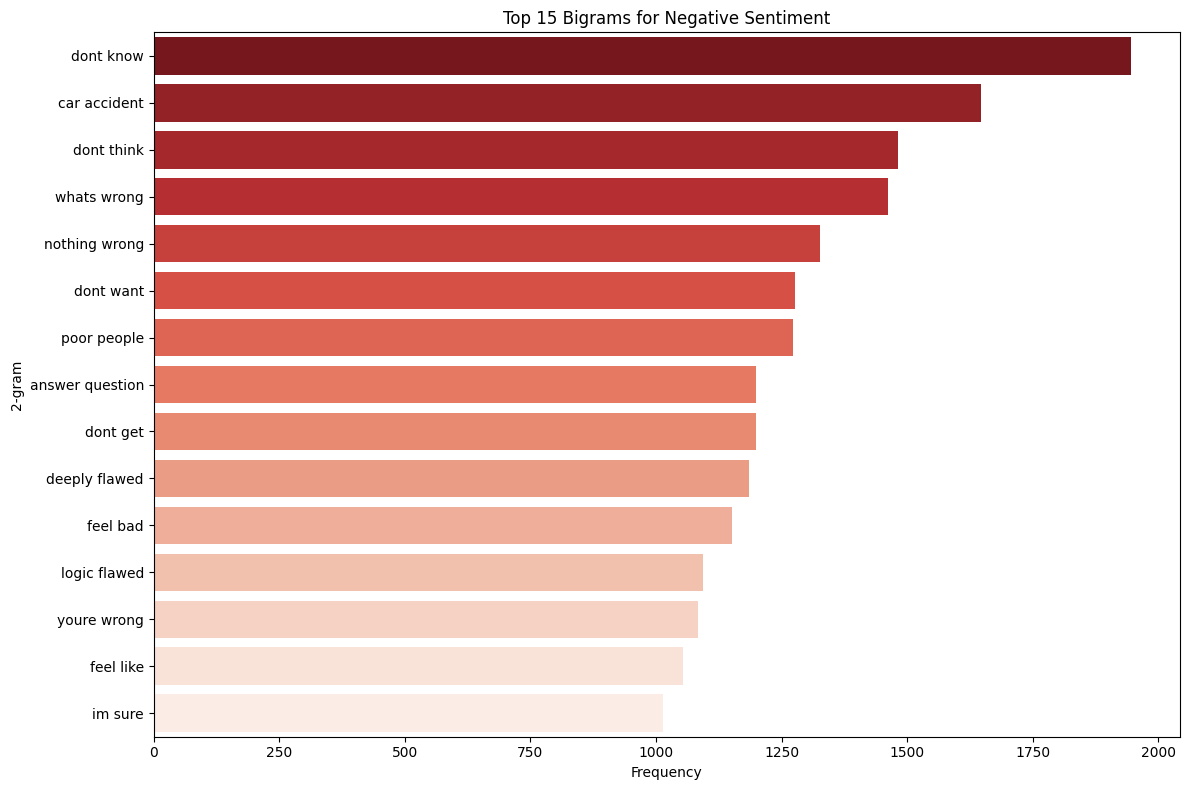

/var/folders/d9/34q0n1js31x765w00t009x6c0000gn/T/ipykernel_3218/2879093300.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df.sort_values(by="Frequency", ascending=False),


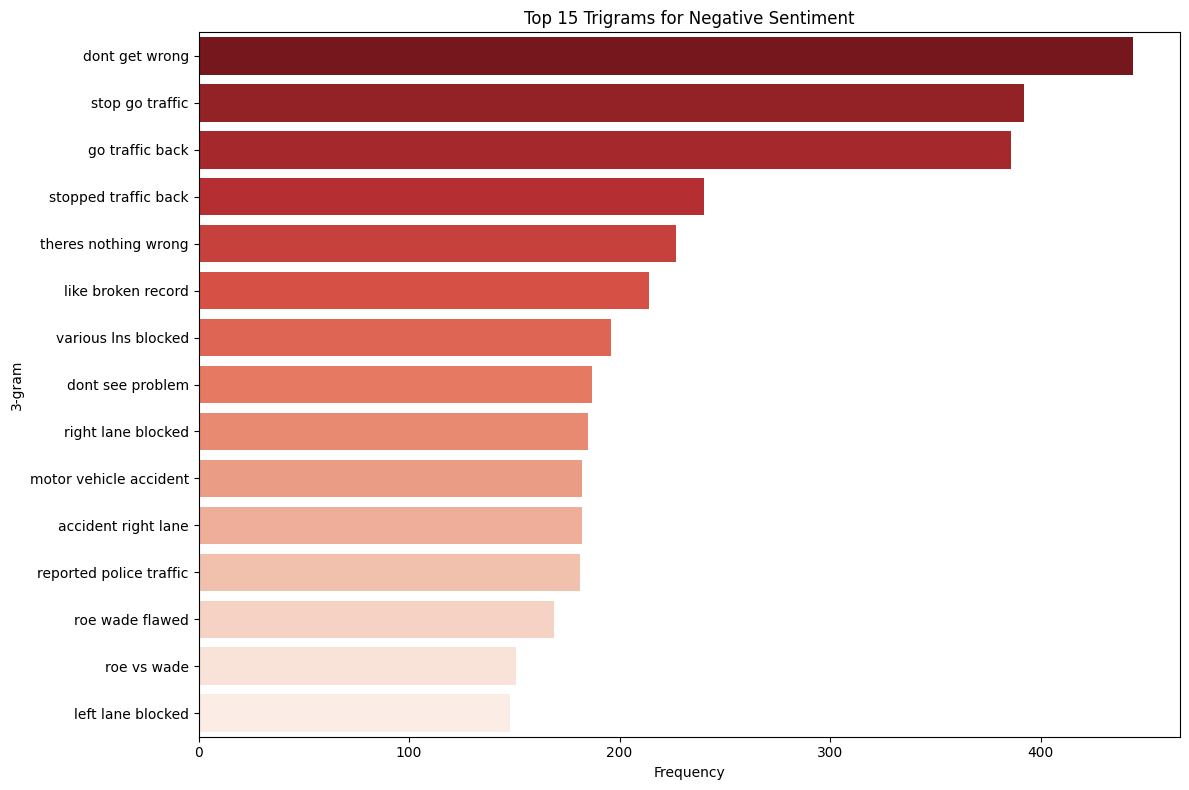


Processing Positive sentiment for N-grams...


/var/folders/d9/34q0n1js31x765w00t009x6c0000gn/T/ipykernel_3218/2879093300.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df.sort_values(by="Frequency", ascending=False),


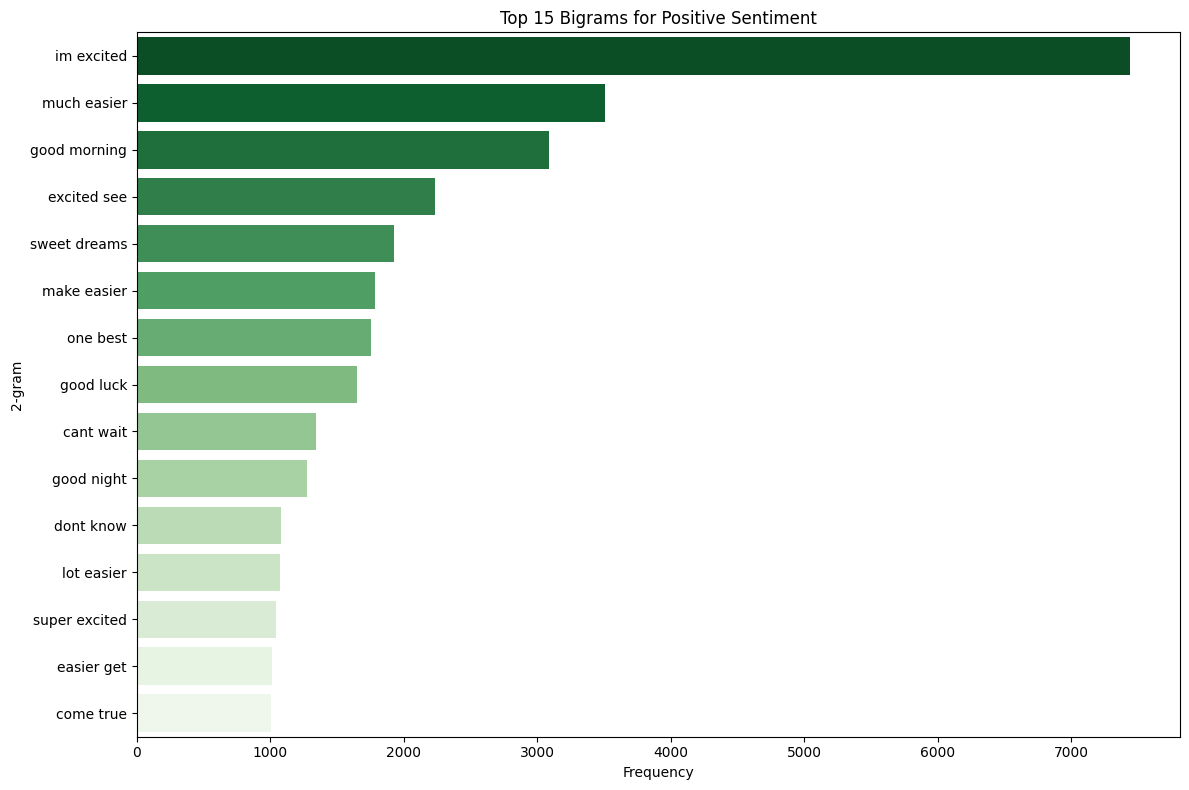

/var/folders/d9/34q0n1js31x765w00t009x6c0000gn/T/ipykernel_3218/2879093300.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df.sort_values(by="Frequency", ascending=False),


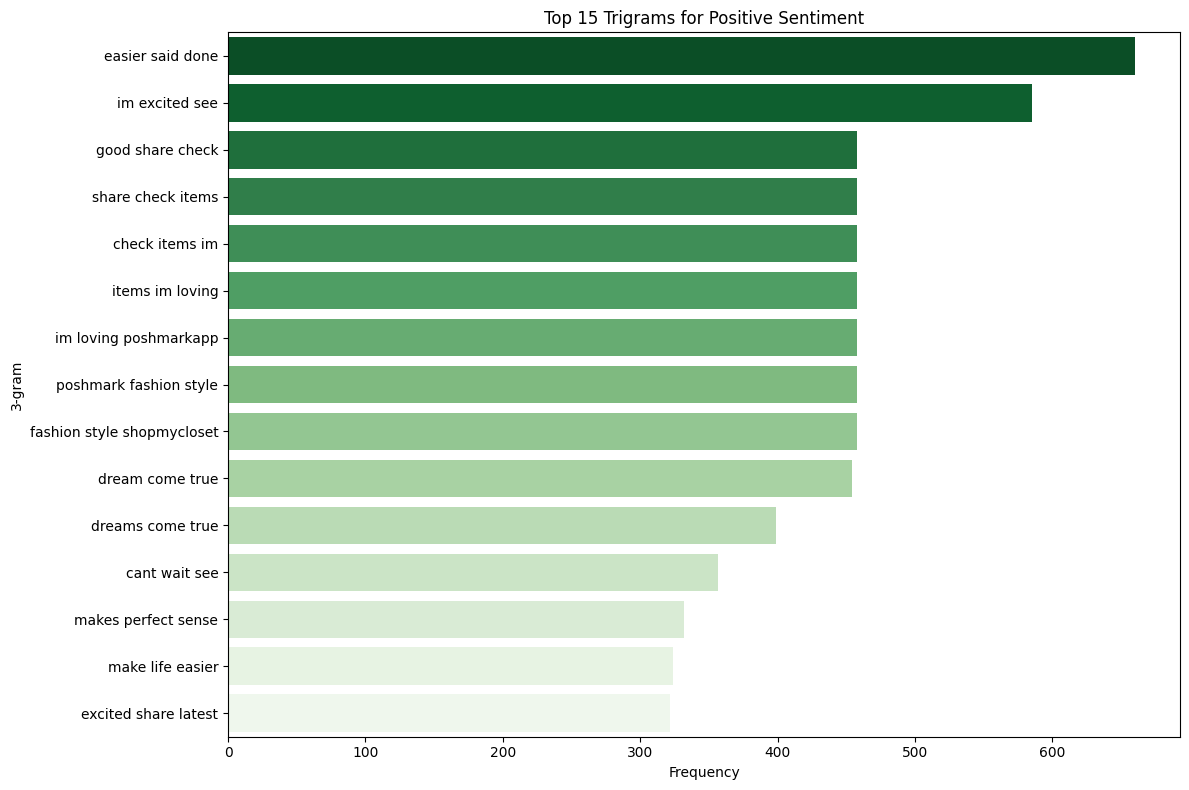


Processing Neutral sentiment for N-grams...


/var/folders/d9/34q0n1js31x765w00t009x6c0000gn/T/ipykernel_3218/2879093300.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df.sort_values(by="Frequency", ascending=False),


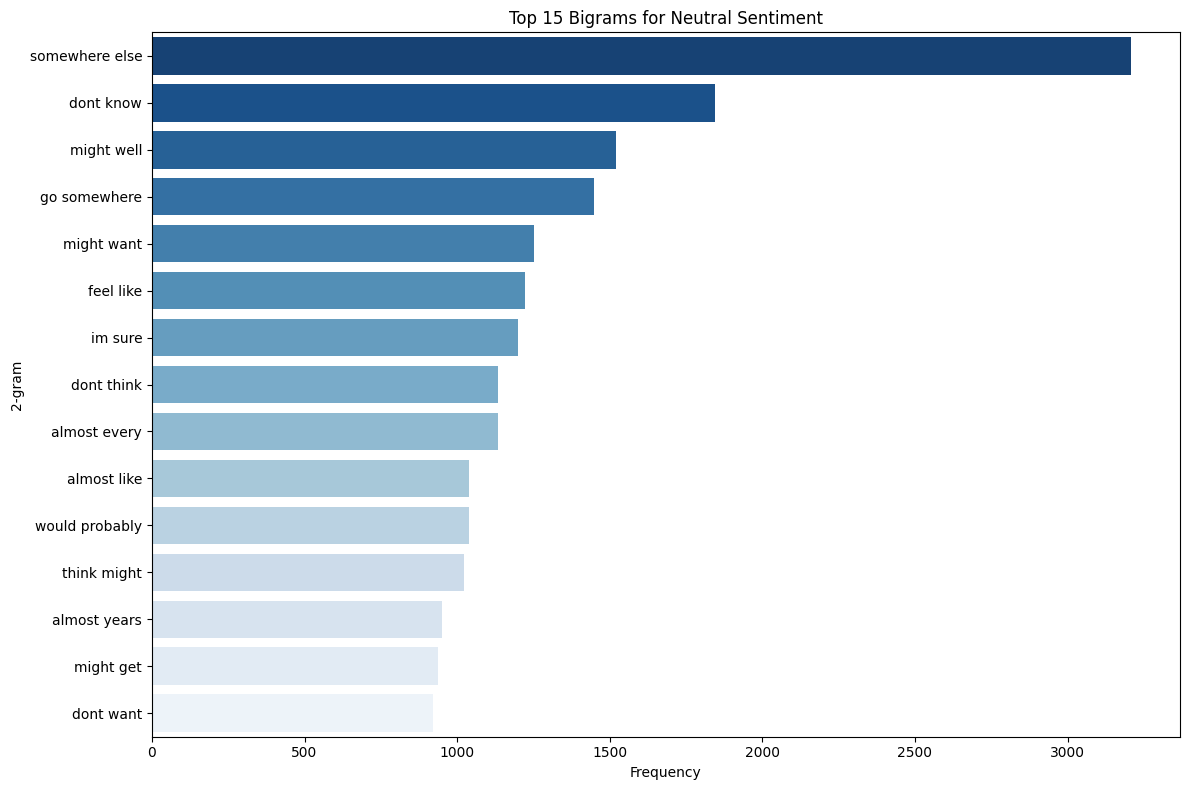

/var/folders/d9/34q0n1js31x765w00t009x6c0000gn/T/ipykernel_3218/2879093300.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df.sort_values(by="Frequency", ascending=False),


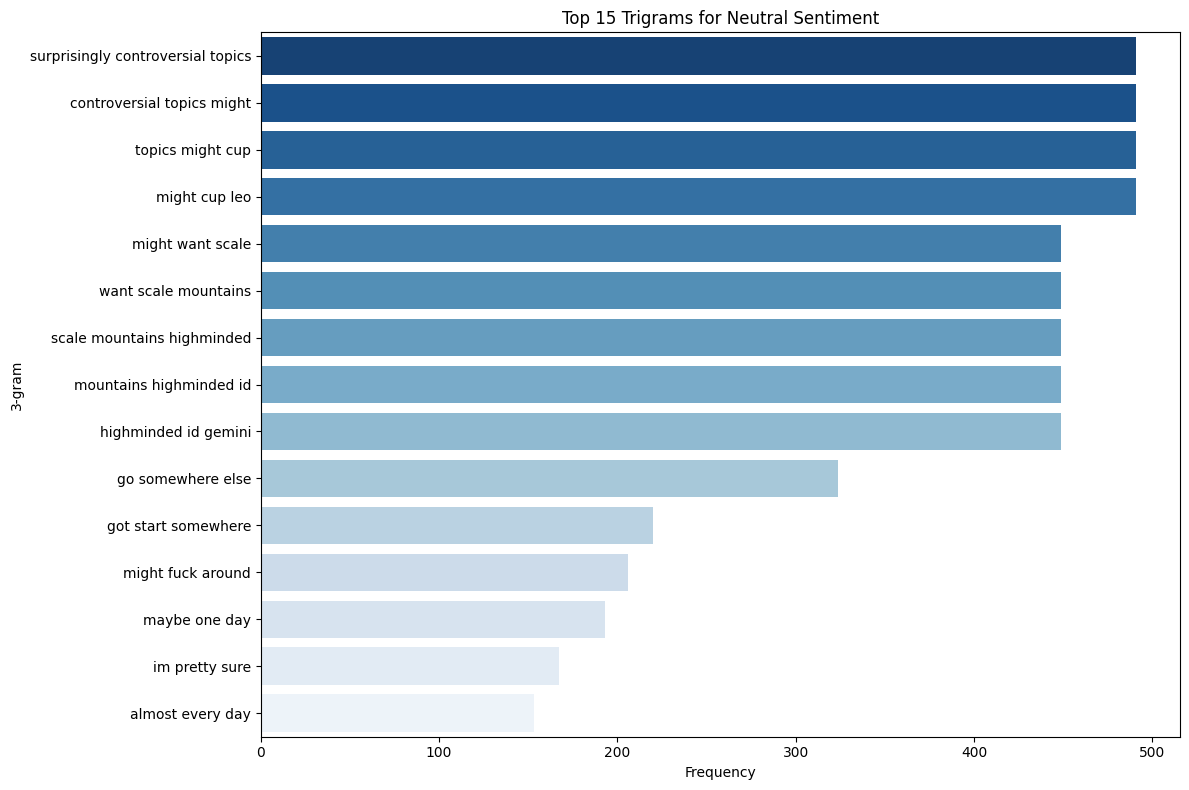

In [37]:
for label_code, sentiment_name in sentiment_labels.items():
    print(f"\nProcessing {sentiment_name} sentiment for N-grams...")
    sentiment_data = df[df['label'] == label_code]['text_clean'].dropna()
    plot_top_n_grams(sentiment_data,
                     title=f'Top {15} Bigrams for {sentiment_name} Sentiment',
                     n=2, top_k=15, sentiment_label_for_palette=sentiment_name)
    plot_top_n_grams(sentiment_data,
                     title=f'Top {15} Trigrams for {sentiment_name} Sentiment',
                     n=3, top_k=15, sentiment_label_for_palette=sentiment_name)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
def plot_top_tfidf_words(corpus, title, top_k=15, sentiment_label_for_palette="Positive"):
    tfidf_vec = TfidfVectorizer()
    tfidf_matrix = tfidf_vec.fit_transform(corpus)
    feature_names = np.array(tfidf_vec.get_feature_names_out())
    mean_tfidf_scores = tfidf_matrix.mean(axis=0).A1
    top_indices = np.argsort(mean_tfidf_scores)[::-1][:top_k]
    top_terms = feature_names[top_indices]
    top_scores = mean_tfidf_scores[top_indices]
    top_df = pd.DataFrame({'Word': top_terms, 'Mean_TF-IDF': top_scores})
    plt.figure(figsize=(12, 8))
    palette_colors = {
        'Positive': 'Greens_r',
        'Negative': 'Reds_r',
        'Neutral': 'Blues_r',
        'Default': 'mako' # Default palette if sentiment name not matched
    }
    current_palette = palette_colors.get(sentiment_label_for_palette, palette_colors['Default'])
    sns.barplot(x='Mean_TF-IDF', y='Word', data=top_df.sort_values(by="Mean_TF-IDF", ascending=False),
                    palette=current_palette)
    plt.title(title)
    plt.xlabel('Mean TF-IDF Score')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()
    

/var/folders/d9/34q0n1js31x765w00t009x6c0000gn/T/ipykernel_3218/4188695192.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean_TF-IDF', y='Word', data=top_df.sort_values(by="Mean_TF-IDF", ascending=False),


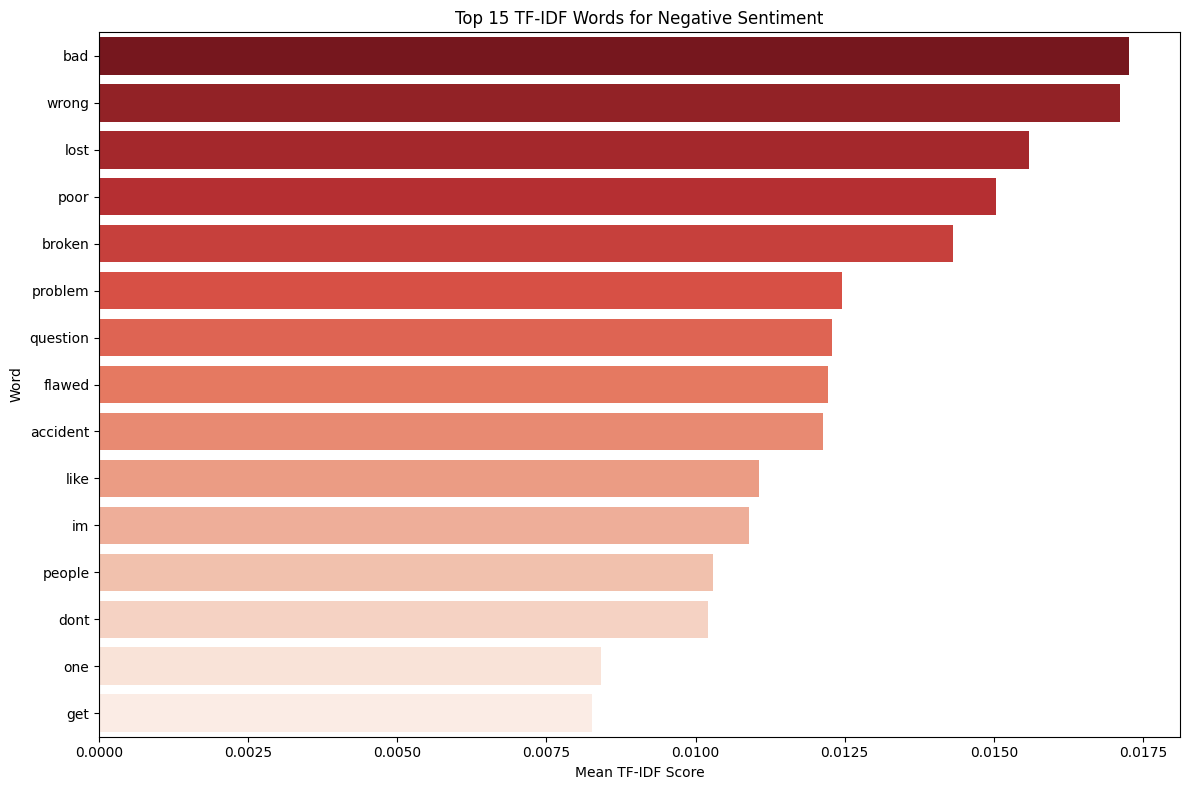

/var/folders/d9/34q0n1js31x765w00t009x6c0000gn/T/ipykernel_3218/4188695192.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean_TF-IDF', y='Word', data=top_df.sort_values(by="Mean_TF-IDF", ascending=False),


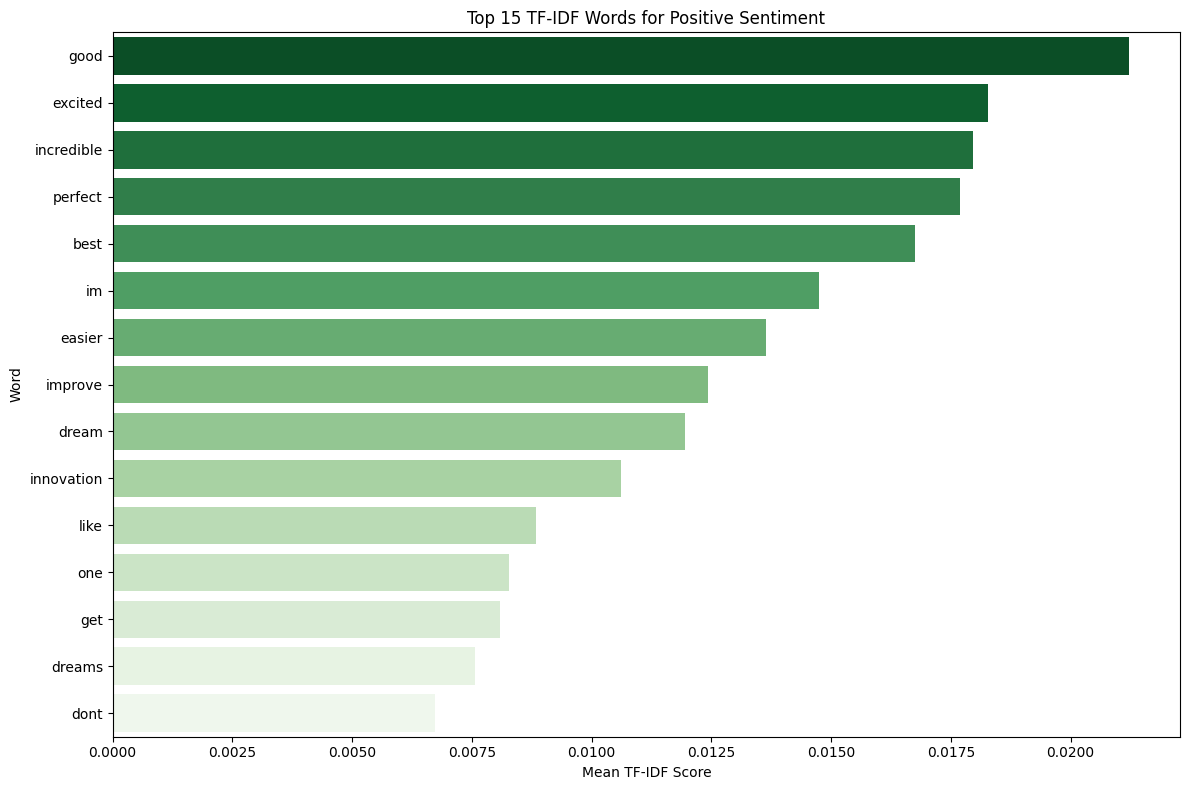

/var/folders/d9/34q0n1js31x765w00t009x6c0000gn/T/ipykernel_3218/4188695192.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean_TF-IDF', y='Word', data=top_df.sort_values(by="Mean_TF-IDF", ascending=False),


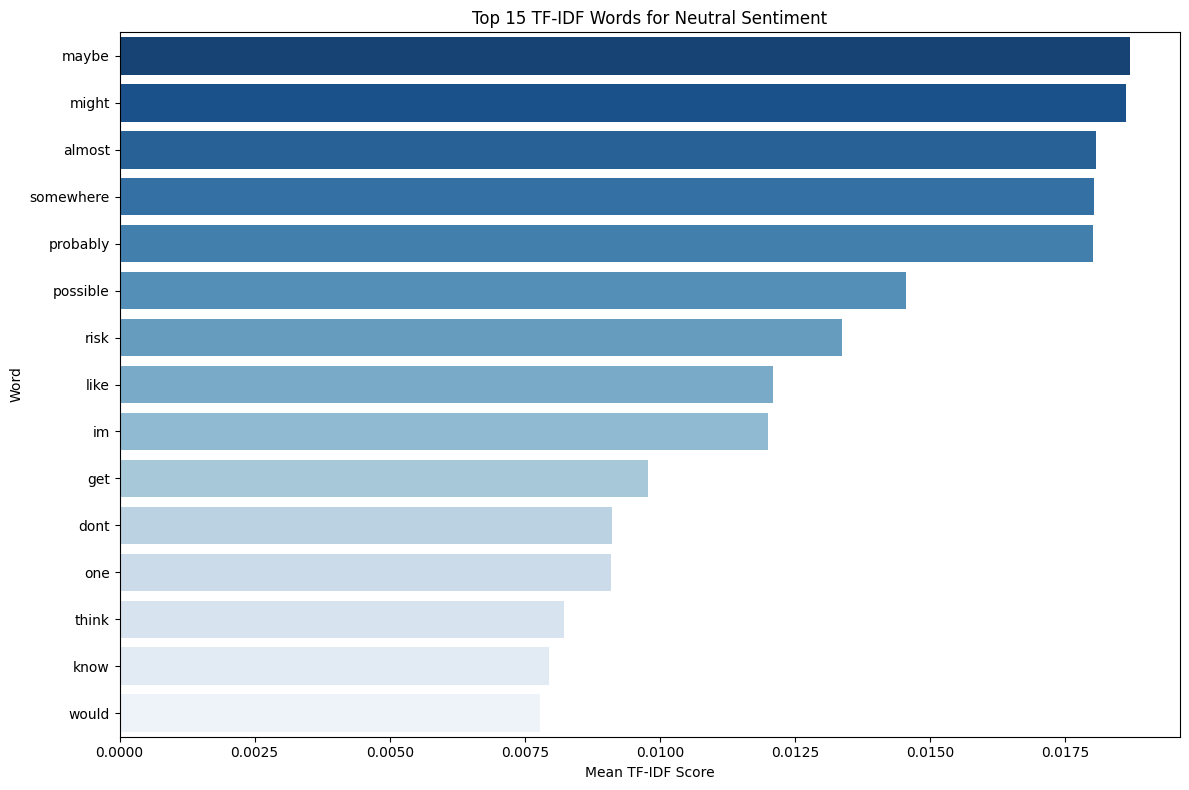

In [40]:
for label_code, sentiment_name in sentiment_labels.items():
    sentiment_data = df[df['label'] == label_code]['text_clean'].dropna()
    plot_top_tfidf_words(sentiment_data,
                         title=f'Top {15} TF-IDF Words for {sentiment_name} Sentiment',
                         top_k=15, sentiment_label_for_palette=sentiment_name)